In [74]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [34]:
passageiros = pd.read_csv("../data/files/passageiros.csv")
passageiros.head()


,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [35]:
mpl.rcParams['figure.figsize'] = (24, 6)
mpl.rcParams['font.size'] = 18


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

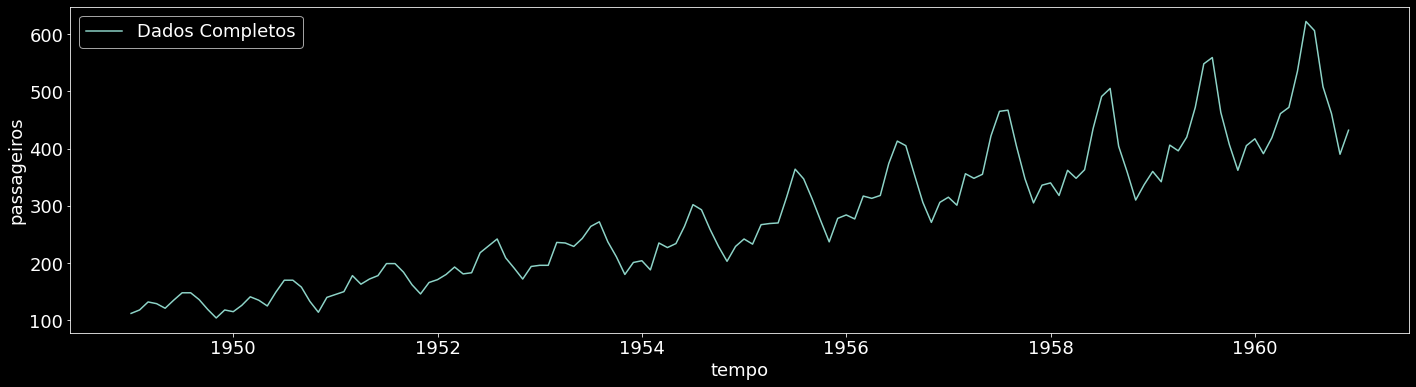

In [36]:
sns.lineplot(x='tempo', y='passageiros',
             data=passageiros, label="Dados Completos")


In [37]:
sc = StandardScaler()
sc.fit(passageiros)


StandardScaler()

In [38]:
dados_escalados = sc.transform(passageiros)


In [39]:
x, y = dados_escalados[:, 0], dados_escalados[:, 1]


Text(0.5, 0, 'Data')

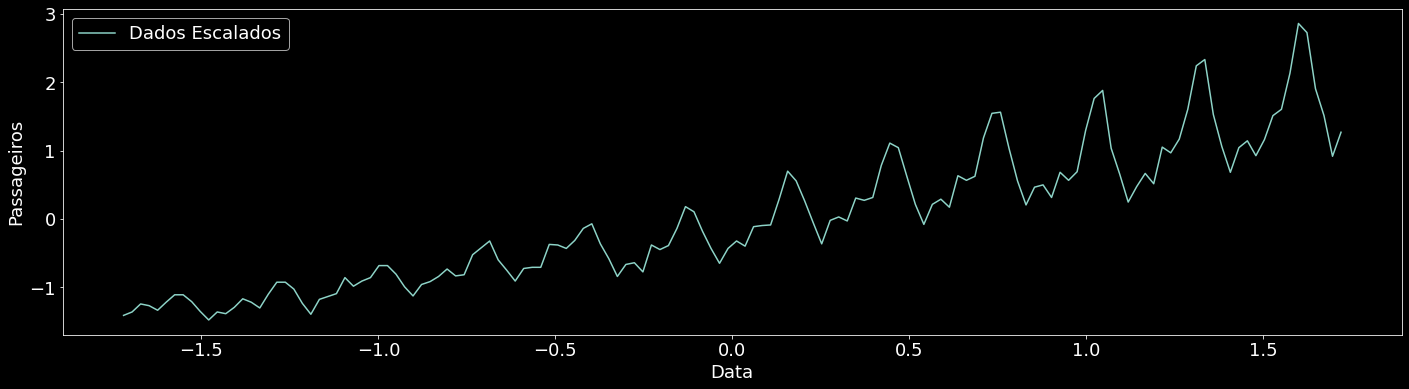

In [40]:
sns.lineplot(x=x, y=y, label="Dados Escalados")
plt.ylabel('Passageiros')
plt.xlabel('Data')


In [41]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino


In [42]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]


Text(0.5, 0, 'Data')

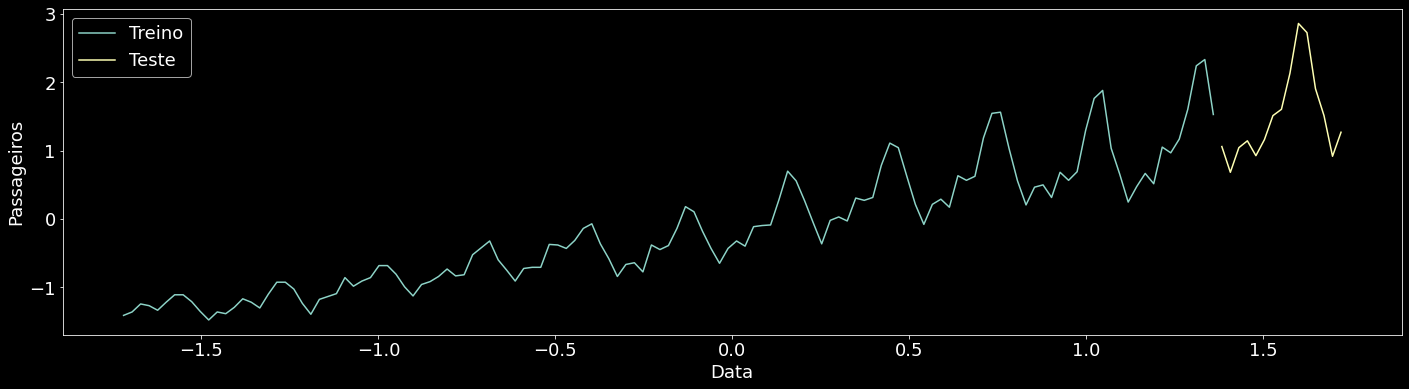

In [43]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [44]:
regressor = Sequential()

In [45]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones',
              use_bias=False, activation="linear"))


In [46]:
regressor.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])


In [47]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [48]:
regressor.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_4_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'units': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'Ones', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [49]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 0s 5ms/step - loss: 0.1284 - accuracy: 0.0000e+00


In [50]:
y_predict = regressor.predict(x_treino)

5/5 [==============================] - 0s 2ms/step


<AxesSubplot:>

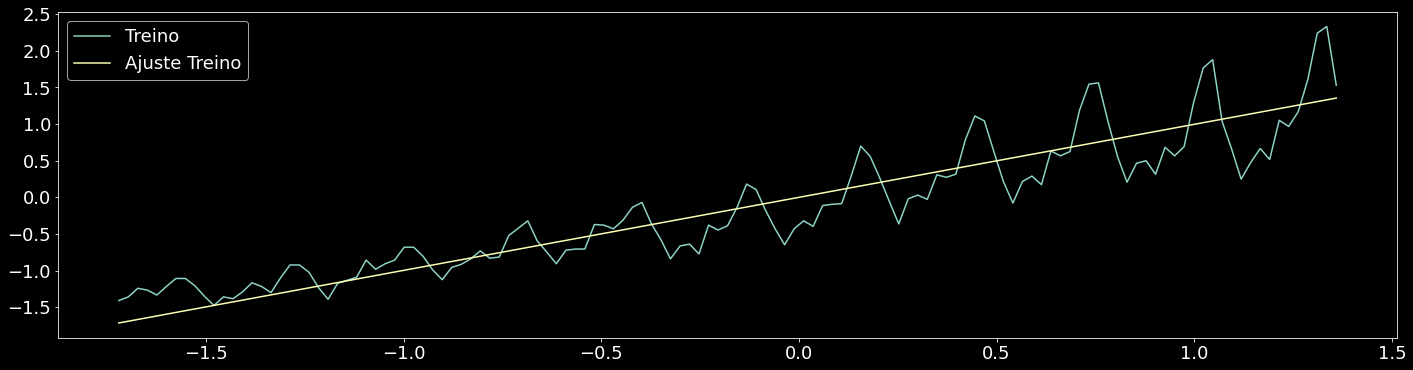

In [51]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_treino, y=y_predict[:,0], label="Ajuste Treino")

In [52]:
tmp = {'tempo': x_treino, 'passageiros': y_predict[:, 0]}
resultados = pd.DataFrame(data=tmp)


In [53]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

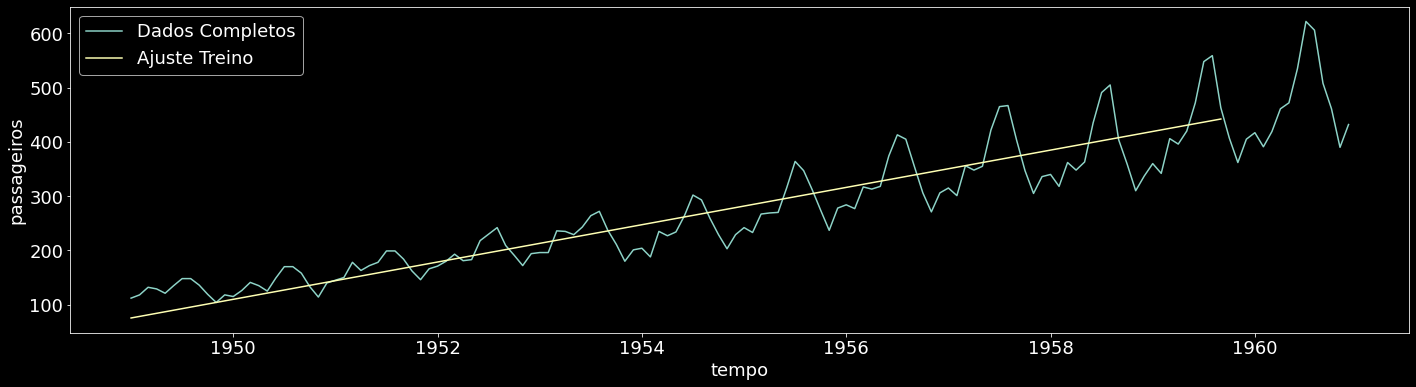

In [54]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label="Dados Completos")
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label="Ajuste Treino")

In [55]:
y_predict_teste = regressor.predict(x_teste)
tmp = {'tempo': x_teste, 'passageiros': y_predict_teste[:, 0]}
resultado_testes = pd.DataFrame(data=tmp)
resultado_testes = sc.inverse_transform(resultado_testes)
resultado_testes = pd.DataFrame(resultado_testes)
resultado_testes.columns = ['tempo', 'passageiros']

1/1 [==============================] - 0s 35ms/step


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

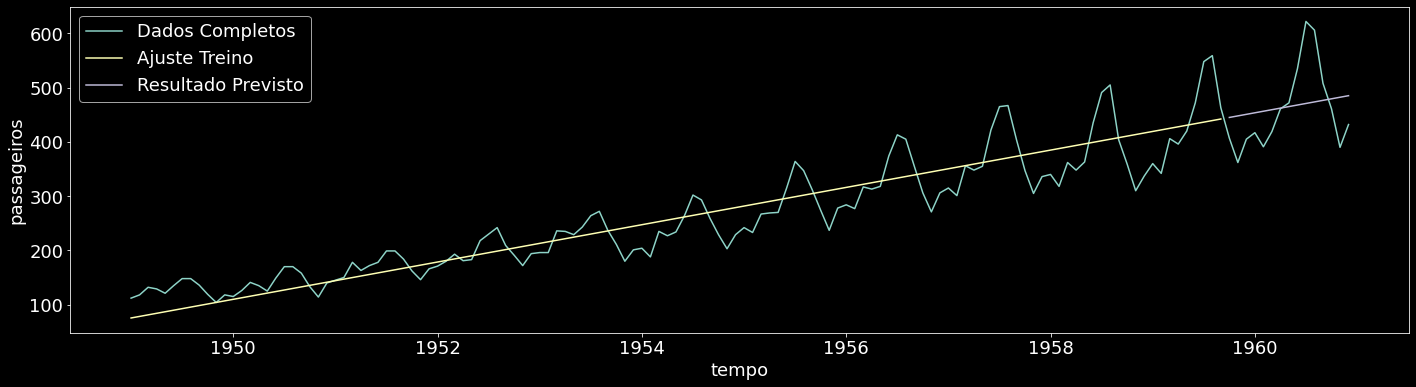

In [56]:
sns.lineplot(x='tempo', y='passageiros',
             data=passageiros, label="Dados Completos")
sns.lineplot(x='tempo', y='passageiros',
             data=resultado_transf, label="Ajuste Treino")
sns.lineplot(x='tempo', y='passageiros',
             data=resultado_testes, label="Resultado Previsto")


In [66]:
regressor2 = Sequential()

In [67]:
regressor2.add(Dense(8, input_dim=1,kernel_initializer="random_uniform", activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, input_dim=1,kernel_initializer="random_uniform", activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, input_dim=1,kernel_initializer="random_uniform", activation='linear', use_bias=False))

In [68]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
regressor2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 8)                 64        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [70]:
regressor2.fit(x_treino, y_treino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8191
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.8123
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8074
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.8034
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.8005
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7978
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7948
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7924
Epoch 9/200
5/5 [==============================] - 0s 21ms/step - loss: 0.7890
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7864
Epoch 11/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7850
Epoch 12/200
5/5 [==============================] - 0s 12ms/step - loss: 0.7825
Epoch 13/200
5/5 [==============================] - 0s 9ms/

In [71]:
y_predict = regressor2.predict(x_treino)

5/5 [==============================] - 0s 2ms/step


In [72]:
y_predict_teste = regressor2.predict(x_teste)


1/1 [==============================] - 0s 26ms/step


<AxesSubplot:>

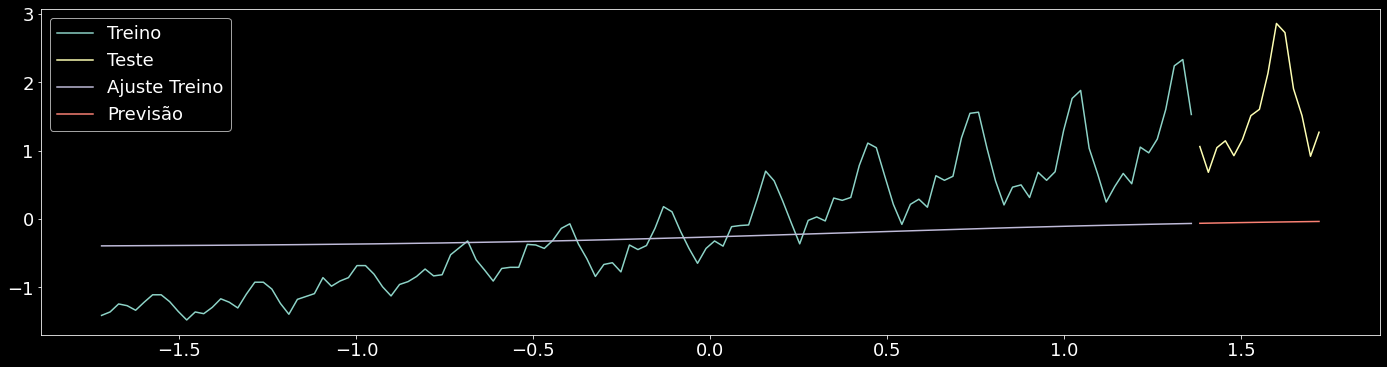

In [73]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
sns.lineplot(x=x_treino, y=y_predict[:,0], label="Ajuste Treino")
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label="Previsão")

In [76]:
vetor = pd.DataFrame(y_treino)[0]

In [75]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i - n_passos:i - 1]))
        y_novo.append(vetor.loc[i])

    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo


In [77]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [78]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [79]:
vetor2 = pd.DataFrame(y_teste)[0]

In [80]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [81]:
regressor3 = Sequential()

In [83]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer="Ones",
               activation='linear', use_bias=False))
regressor3.add(Dense(64, input_dim=1, kernel_initializer="random_uniform",
                     activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, input_dim=1, kernel_initializer="random_uniform",
                     activation='linear', use_bias=False))


In [84]:
regressor3.compile(loss="mean_squared_error", optimizer='adam')


In [85]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)


Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7883
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6370
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5072
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3874
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2923
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2114
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1572
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1165
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0954
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0868
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0863
Epoch 12/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0845
Epoch 13/100
4/4 [==============================] - 0s 7ms/

In [86]:
y_predict_novo = regressor3.predict(x_treino_novo)

4/4 [==============================] - 0s 4ms/step


<AxesSubplot:xlabel='tempo', ylabel='0'>

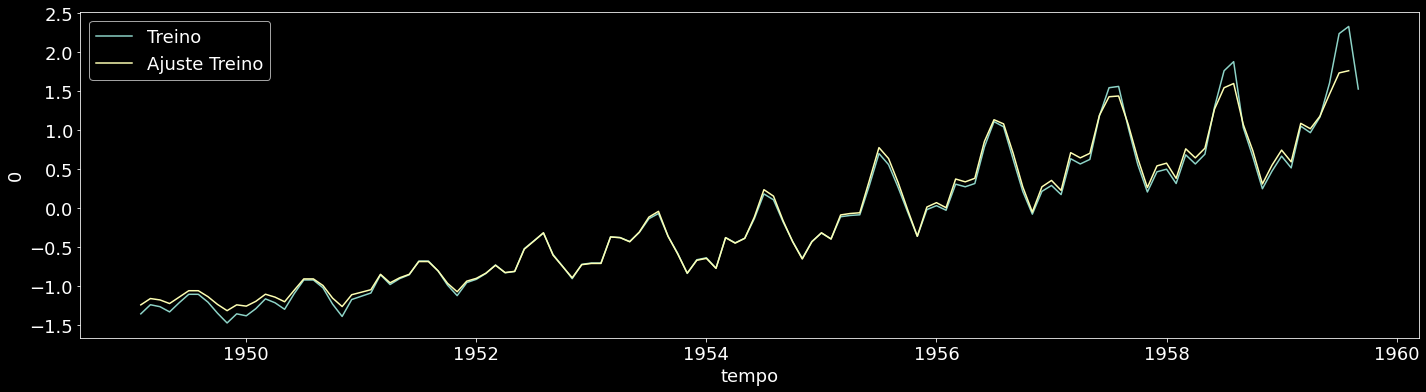

In [88]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label="Treino")
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label="Ajuste Treino")